# Quantum Phase Estimation

**Victor Onofre**

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib

In [2]:
style = {'backgroundcolor': 'lightyellow'} # Style of the circuits
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

$$U |\psi> = e^{i \theta_{\psi}} |\psi> $$

The quantum phase estimation algorithm extract $\theta_{\psi}$ given the ability to prepare $|\psi>$

## Step 0: Prepare the state 

$$ |\phi_{0}> = |0>^{\otimes^{n}} |\psi> $$

## Step 1: Apply the hadamard gate

$$  |\phi_{1}> = H^{\otimes^{n}}|0>^{\otimes^{n}} |\psi>  = \frac{1}{\Big( \sqrt{2} \Big)^{n}} \Big(|0> + |1>  \Big)^{\otimes^{n}} |\psi>$$

## Step 3: Apply the operator U

$$ |\phi_{2}> = \frac{1}{\Big( \sqrt{2} \Big)^{n}} \Big(|0> +  e^{i \theta_{\psi} 2^{n-1} }|1>  \Big) \otimes \Big(|0> +  e^{i \theta_{\psi} 2^{n-2} }|1>  \Big) \otimes...\otimes \Big(|0> +  e^{i \theta_{\psi} 2^{0} }|1>  \Big)  |\psi> $$

## Step 3: Apply the inverse QFT

$$  | \widetilde{x} > = QFT|x> = \frac{1}{\sqrt{N}} \Big( |0> + e^{\frac{2\pi i x}{2}} |1> \Big) \otimes \Big( |0> + e^{\frac{2\pi i x}{2^{2}}} |1> \Big) \otimes... \otimes \Big( |0> + e^{\frac{2\pi i x}{2^{n}}} |1> \Big)$$

$$ |\phi_{3}> = QFT^{-1} |\phi_{2}> \rightarrow \text{Measurement in the computational basis} \rightarrow  |2^{n} \theta_{\phi}> |\phi>$$

$$\theta_{\phi} =  \frac{x}{2^{n}} $$

# Initial state

In [3]:
qc = QuantumCircuit(4,3)

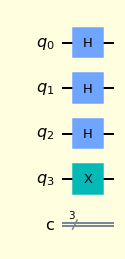

In [4]:
qc.h(0)
qc.h(1)
qc.h(2)
qc.x(3)

qc.draw(output = 'mpl', style = style)

$$|\phi_{1}> = \Big( H \otimes H \otimes H \otimes X \Big) |0>_{0}|0>_{1}|0>_{2} |0>_{3}$$

$$|\phi_{1}> = H|0>_{0}H|0>_{1}H|0>_{2} X|0>_{3}$$

$$|\phi_{1}> = \frac{1}{\sqrt{2}} \Big(|0>_{0} + |1>_{0} \Big) \frac{1}{\sqrt{2}} \Big(|0>_{1} + |1>_{1} \Big) \frac{1}{\sqrt{2}} \Big(|0>_{2} + |1>_{2} \Big) |1>_{3}$$

$$|\phi_{1}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} } \Big(|0>_{0} + |1>_{0} \Big)  \Big(|0>_{1} + |1>_{1} \Big)  \Big(|0>_{2} + |1>_{2} \Big) |1>_{3}$$

The $CP(\theta)$ perform a phase rotation if both qubits are in the $|11 >$ state. With the matrix representation: 

$$CP(\theta) = \begin{bmatrix}1 & 0 & 0 & 0 \\ 
                              0 & 1 & 0 & 0\\ 
                              0 & 0 & 1 & 0\\
                              0 & 0 & 0 & e^{i\theta}\end{bmatrix}$$

# Part I : $\theta_{\phi} = \pi/4$

In this case $n=3$, rembering the step 3

$$ |\phi_{2}> = \frac{1}{\Big( \sqrt{2} \Big)^{n}} \Big(|0> +  e^{i \theta_{\psi} 2^{n-1} }|1>  \Big) \otimes \Big(|0> +  e^{i \theta_{\psi} 2^{n-2} }|1>  \Big) \otimes...\otimes \Big(|0> +  e^{i \theta_{\psi} 2^{0} }|1>  \Big)  |\psi> $$

CP($\theta$) will be apply to the first qubit $2^{3-3} = 2^{0} =1$ times

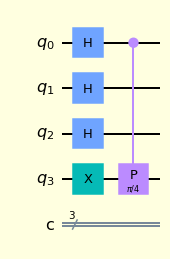

In [5]:
qc.cp(np.pi/4,0,3)

qc.draw(output = 'mpl', style = style)

$$|\phi_{2}> = CP(\pi/4)_{03}|\phi_{1}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  CP(\pi/4)_{03} \Big(|0>_{0}|1>_{3} + |1>_{0}|1>_{3} \Big) \Big(|0>_{1}|1>_{3} + |1>_{1}|1>_{3} \Big) \Big(|0>_{2}|1>_{3} + |1>_{2}|1>_{3} \Big) $$

$$|\phi_{2}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{0}|1>_{3} + e^{i\pi/4}|1>_{0}|1>_{3} \Big) \Big(|0>_{1}|1>_{3} + |1>_{1}|1>_{3} \Big) \Big(|0>_{2}|1>_{3} + |1>_{2}|1>_{3} \Big) $$

# Part II

CP($\theta$) will be apply to the second qubit $2^{3-2}= 2^{1} =2 $ times 

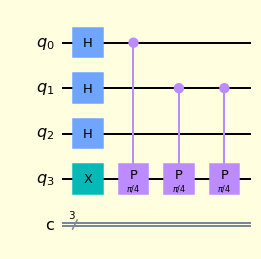

In [6]:
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/4,1,3)
qc.draw(output = 'mpl', style = style)

$$|\phi_{3}> = CP(\pi/4)_{13}CP(\pi/4)_{13}|\phi_{2}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{0}|1>_{3} + e^{i\pi/4}|1>_{0}|1>_{3} \Big) CP(\pi/4)_{13}CP(\pi/4)_{13} \Big(|0>_{1}|1>_{3} + |1>_{1}|1>_{3} \Big) \Big(|0>_{2}|1>_{3} + |1>_{2}|1>_{3} \Big) $$

$$|\phi_{3}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{0}|1>_{3} + e^{i\pi/4}|1>_{0}|1>_{3} \Big) CP(\pi/4)_{13} \Big(|0>_{1}|1>_{3} + e^{i\pi/4} |1>_{1}|1>_{3} \Big) \Big(|0>_{2}|1>_{3} + |1>_{2}|1>_{3} \Big) $$

$$|\phi_{3}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{0}|1>_{3} + e^{i\pi/4}|1>_{0}|1>_{3} \Big) \Big(|0>_{1}|1>_{3} + e^{i\pi/4} e^{i\pi/4}|1>_{1}|1>_{3} \Big) \Big(|0>_{2}|1>_{3} + |1>_{2}|1>_{3} \Big) $$

$$|\phi_{3}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{0}|1>_{3} + e^{i\pi/4}|1>_{0}|1>_{3} \Big) \Big(|0>_{1}|1>_{3} + e^{ 2 (i\pi/4)  }|1>_{1}|1>_{3} \Big) \Big(|0>_{2}|1>_{3} + |1>_{2}|1>_{3} \Big) $$

# Part III

CP($\theta$) will be apply to the third qubit $2^{3-1}= 2^{2} =4 $ times

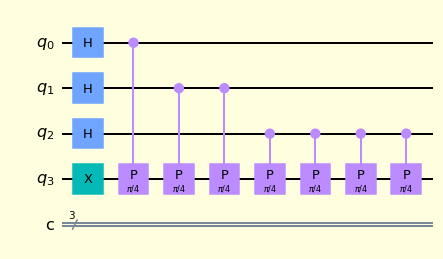

In [7]:
qc.cp(np.pi/4,2,3)
qc.cp(np.pi/4,2,3)
qc.cp(np.pi/4,2,3)
qc.cp(np.pi/4,2,3)
qc.draw(output = 'mpl', style = style)

$$|\phi_{4}>  =  CP(\pi/4)_{23}CP(\pi/4)_{23} CP(\pi/4)_{23}CP(\pi/4)_{23}|\phi_{3}> $$

$$|\phi_{4}>  =  \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{0}|1>_{3} + e^{i\pi/4}|1>_{0}|1>_{3} \Big) \Big(|0>_{1}|1>_{3} + e^{ 2 (i\pi/4)  }|1>_{1}|1>_{3} \Big) CP(\pi/4)_{23}CP(\pi/4)_{23} CP(\pi/4)_{23}CP(\pi/4)_{23} \Big(|0>_{2}|1>_{3} + |1>_{2}|1>_{3} \Big) $$

$$|\phi_{4}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{0}|1>_{3} + e^{i\pi/4}|1>_{0}|1>_{3} \Big) \Big(|0>_{1}|1>_{3} + e^{ 2 (i\pi/4)  }|1>_{1}|1>_{3} \Big) \Big(|0>_{2}|1>_{3} + e^{4(i\pi/4)} |1>_{2}|1>_{3} \Big) $$

# Part IV: Apply the Inverse Quantum Fourier Transform

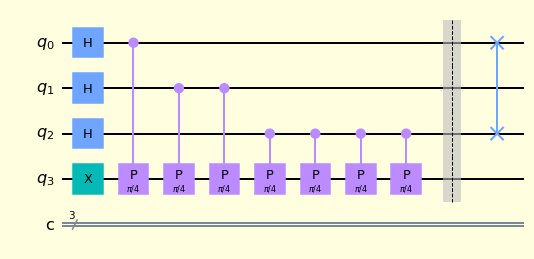

In [11]:
qc.barrier()
qc.swap(0,2)
qc.draw(output = 'mpl', style = style)

$$|\phi_{4}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{0} + e^{i\pi/4}|1>_{0} \Big) \Big(|0>_{1}+ e^{ 2 (i\pi/4)  }|1>_{1} \Big) \Big(|0>_{2} + e^{4(i\pi/4)} |1>_{2} \Big) |1>_{3} $$

$$|\phi_{5}> = SWAP_{02}|\phi_{4}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{2} + e^{i\pi/4}|1>_{2} \Big) \Big(|0>_{1}+ e^{ 2 (i\pi/4)  }|1>_{1} \Big) \Big(|0>_{0} + e^{4(i\pi/4)} |1>_{0} \Big) |1>_{3} $$

$$|\phi_{5}> =\frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{2} + e^{i\pi/4}|1>_{2} \Big) \Big(|0>_{1}+ i|1>_{1} \Big) \Big(|0>_{0} -  |1>_{0} \Big) |1>_{3} $$

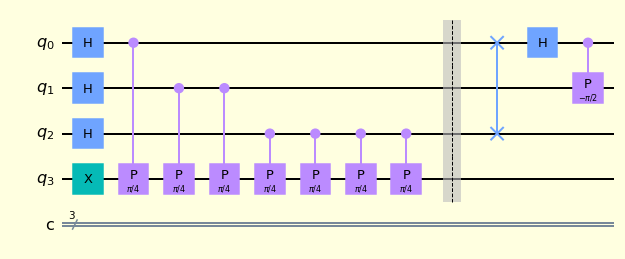

In [12]:
qc.h(0)
qc.cp(-np.pi/2, 0,1)
qc.draw(output = 'mpl', style = style)

$$|\phi_{6}> = CP(-\pi/2)_{01}H_{0}|\phi_{5}> = \frac{1}{\Big( \sqrt{2} \Big)^{3} }  \Big(|0>_{2} + e^{i\pi/4}|1>_{2} \Big)  CP(-\pi/2)_{01} \Big(|0>_{1}+ i|1>_{1} \Big) H_{0} \Big(|0>_{0} -  |1>_{0} \Big) |1>_{3}$$

$$|\phi_{6}> = \frac{1}{\Big( \sqrt{2} \Big)^{2} }  \Big(|0>_{2} + e^{i\pi/4}|1>_{2} \Big)  CP(-\pi/2)_{01} \Big(|0>_{1}+ i|1>_{1} \Big) |1>_{0}  |1>_{3}$$

$$|\phi_{6}> = \frac{1}{\Big( \sqrt{2} \Big)^{2} }  \Big(|0>_{2} + e^{i\pi/4}|1>_{2} \Big) \Big(|0>_{1}+ i e^{-i\pi/2} |1>_{1} \Big) |1>_{0}  |1>_{3}$$

$$|\phi_{6}> = \frac{1}{\Big( \sqrt{2} \Big)^{2} }  \Big(|0>_{2} + e^{i\pi/4}|1>_{2} \Big) \Big(|0>_{1}+ i (-i) |1>_{1} \Big) |1>_{0}  |1>_{3}$$

$$|\phi_{6}> = \frac{1}{\Big( \sqrt{2} \Big)^{2} }  \Big(|0>_{2} + e^{i\pi/4}|1>_{2} \Big) \Big(|0>_{1}+ |1>_{1} \Big) |1>_{0}  |1>_{3}$$

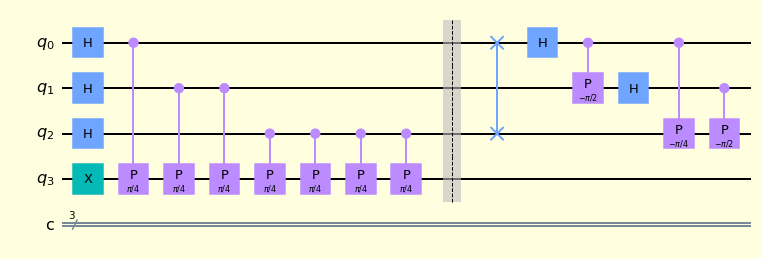

In [13]:
qc.h(1)
qc.cp(-np.pi/4, 0,2)
qc.cp(-np.pi/2, 1,2)
qc.draw(output = 'mpl', style = style)

$$|\phi_{7}> =  CP(-\pi/2)_{12}  CP(-\pi/4)_{02}H_{1}|\phi_{6}> =  \frac{1}{\Big( \sqrt{2} \Big)^{2} }  CP(-\pi/2)_{12}  CP(-\pi/4)_{02}  \Big(|0>_{2} + e^{i\pi/4}|1>_{2} \Big) H_{1} \Big(|0>_{1}+ |1>_{1} \Big) |1>_{0}  |1>_{3}$$

$$|\phi_{7}> =  \frac{1}{ \sqrt{2}  }  CP(-\pi/2)_{12}  CP(-\pi/4)_{02}  \Big(|0>_{2} + e^{i\pi/4}|1>_{2} \Big) |0>_{1}|1>_{0}  |1>_{3}$$

$$|\phi_{7}> =   \frac{1}{ \sqrt{2}  }  CP(-\pi/2)_{12} \Big(|0>_{2} +  e^{-i\pi/4} e^{i\pi/4}|1>_{2} \Big) |0>_{1}|1>_{0}  |1>_{3}$$

$$|\phi_{7}> =   \frac{1}{ \sqrt{2}  }  \Big(|0>_{2} + |1>_{2} \Big) |0>_{1}|1>_{0}  |1>_{3}$$

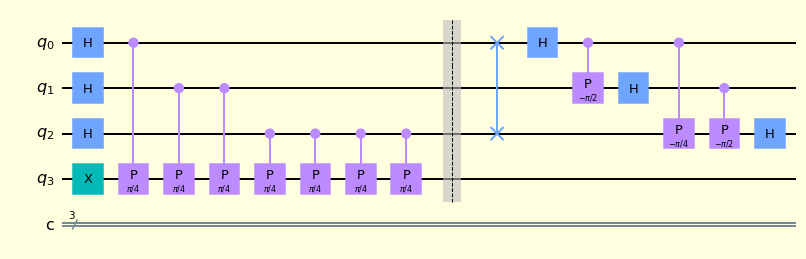

In [14]:
qc.h(2)
qc.draw(output = 'mpl', style = style)

$$|\phi_{9}> = H_{2} |\phi_{8}> =  \frac{1}{ \sqrt{2}  } H_{2} \Big(|0>_{2} + |1>_{2} \Big) |0>_{1}|1>_{0}  |1>_{3}$$

$$|\phi_{9}> = |0>_{2} |0>_{1}|1>_{0}  |1>_{3}$$

# Part V: Measure 

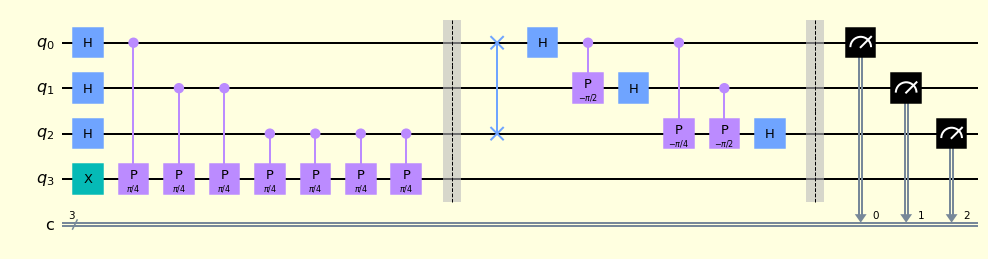

In [15]:
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
    
qc.draw(output = 'mpl', style = style)

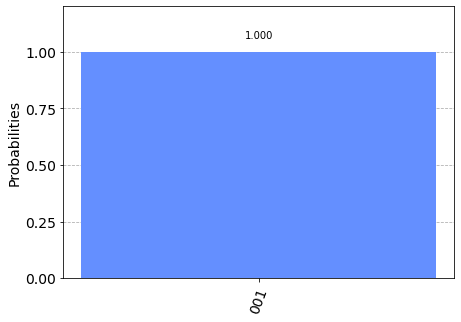

In [16]:
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# Part VI: Get $\theta_{\phi}$

$$ |\phi_{9}> =|0>_{2} |0>_{1}|1>_{0}  |1>_{3} \rightarrow \text{Measurement in the computational basis} \rightarrow  |2^{n} \theta_{\phi}> |\phi> =  |x>|\phi>$$

$$\theta_{\phi} =  \frac{x}{2^{n}} $$

$$ x = 2^{n-1}x_{1}+ 2^{n-2}x_{2}+...2^{0}x_{n} $$

$$x = 001 \quad n=3 \quad x_{1} = 0 \quad  x_{2} = 0  \quad  x_{3} = 1 $$

$$001 \rightarrow 2^{3-1}(0)+2^{3-2}(0) + 2^{0}(1) $$

$$001 \rightarrow 1 $$

$$\theta_{\phi} =  \frac{1}{2^{3}} =  \frac{1}{8}   $$

Remembering that the QFT has a $2 \pi$

$$  | \widetilde{x} > = QFT|x> = \frac{1}{\sqrt{N}} \Big( |0> + e^{\frac{2\pi i x}{2}} |1> \Big) \otimes \Big( |0> + e^{\frac{2\pi i x}{2^{2}}} |1> \Big) \otimes... \otimes \Big( |0> + e^{\frac{2\pi i x}{2^{n}}} |1> \Big)$$

$$\theta_{\phi} =   \frac{2 \pi}{8} =   \frac{ \pi}{4}  $$

# References

[1] Kaye, P. and Kaye, I.Q.C.P. and Laflamme, R. and Mosca, M. and Mosca, I.Q.C.M., An Introduction to Quantum Computing, OUP Oxford, 2007

[2] https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html